<a href="https://colab.research.google.com/github/rathankumarrh/hybrid-cloud/blob/main/California_Housing_IIMK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("California Housing Prices.csv")
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.shape

(20640, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [8]:
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

In [9]:
df.isnull().sum()


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [10]:
df = pd.get_dummies(df, columns=["ocean_proximity"])

In [11]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [12]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]

df["population_per_household"] = df["population"] / df["households"]

df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]


In [13]:
corr = df.corr()["median_house_value"].sort_values(ascending=False)
corr

,median_house_value
median_house_value,1.000000
median_income,0.688075
ocean_proximity_<1H OCEAN,0.256617
ocean_proximity_NEAR BAY,0.160284
rooms_per_household,0.151948
ocean_proximity_NEAR OCEAN,0.141862
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049457


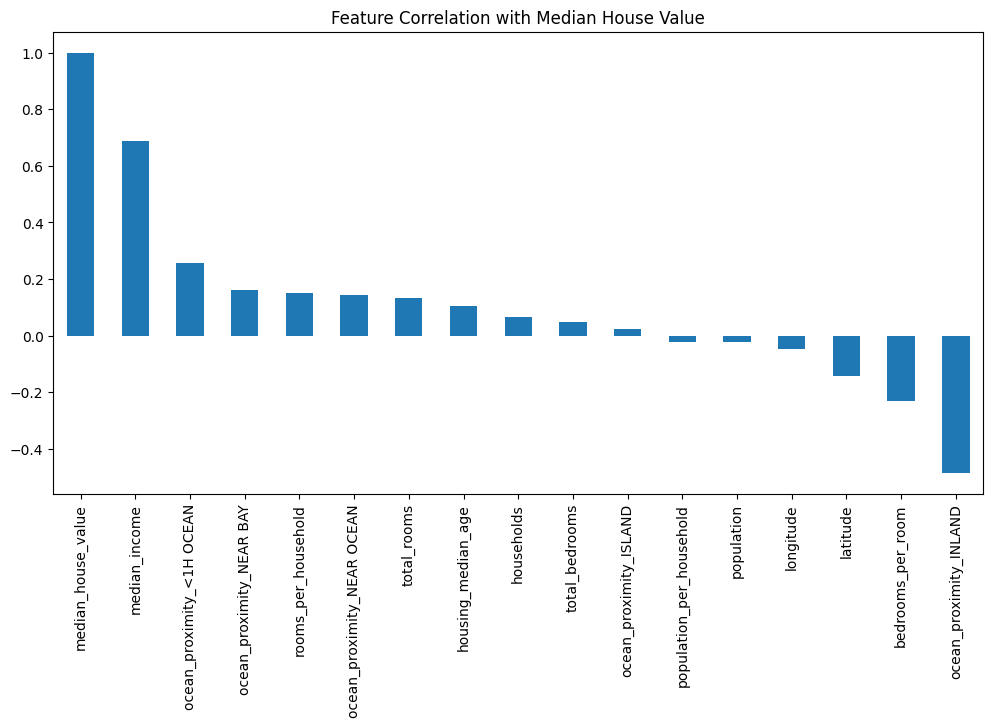

In [14]:
corr.plot(kind="bar", figsize=(12,6))
plt.title("Feature Correlation with Median House Value")
plt.show()

In [15]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
print("Final dataset shape:", X_scaled.shape)
print("Target shape:", y.shape)


Final dataset shape: (20640, 16)
Target shape: (20640,)


In [18]:
print("Final dataset shape:", X_scaled.shape)
print("Target shape:", y.shape)


Final dataset shape: (20640, 16)
Target shape: (20640,)


In [19]:
print("Final dataset shape:", X_scaled.shape)
print("Target shape:", y.shape)



Final dataset shape: (20640, 16)
Target shape: (20640,)


In [20]:
X_scaled[:5]


array([[-1.32783522,  1.05254828,  0.98214266, -0.8048191 , -0.97247648,
        -0.9744286 , -0.97703285,  2.34476576, -0.89115574, -0.68188905,
        -0.01556621,  2.83074203, -0.38446649,  0.62855945, -0.04959654,
        -1.02998783],
       [-1.32284391,  1.04318455, -0.60701891,  2.0458901 ,  1.35714343,
         0.86143887,  1.66996103,  2.33223796, -0.89115574, -0.68188905,
        -0.01556621,  2.83074203, -0.38446649,  0.32704136, -0.09251223,
        -0.8888972 ],
       [-1.33282653,  1.03850269,  1.85618152, -0.53574589, -0.82702426,
        -0.82077735, -0.84363692,  1.7826994 , -0.89115574, -0.68188905,
        -0.01556621,  2.83074203, -0.38446649,  1.15562047, -0.02584253,
        -1.29168566],
       [-1.33781784,  1.03850269,  1.85618152, -0.62421459, -0.71972345,
        -0.76602806, -0.73378144,  0.93296751, -0.89115574, -0.68188905,
        -0.01556621,  2.83074203, -0.38446649,  0.15696608, -0.0503293 ,
        -0.4496128 ],
       [-1.33781784,  1.03850269,  1